In [43]:
import pandas as pd
df=pd.read_csv('/content/gold.csv')
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


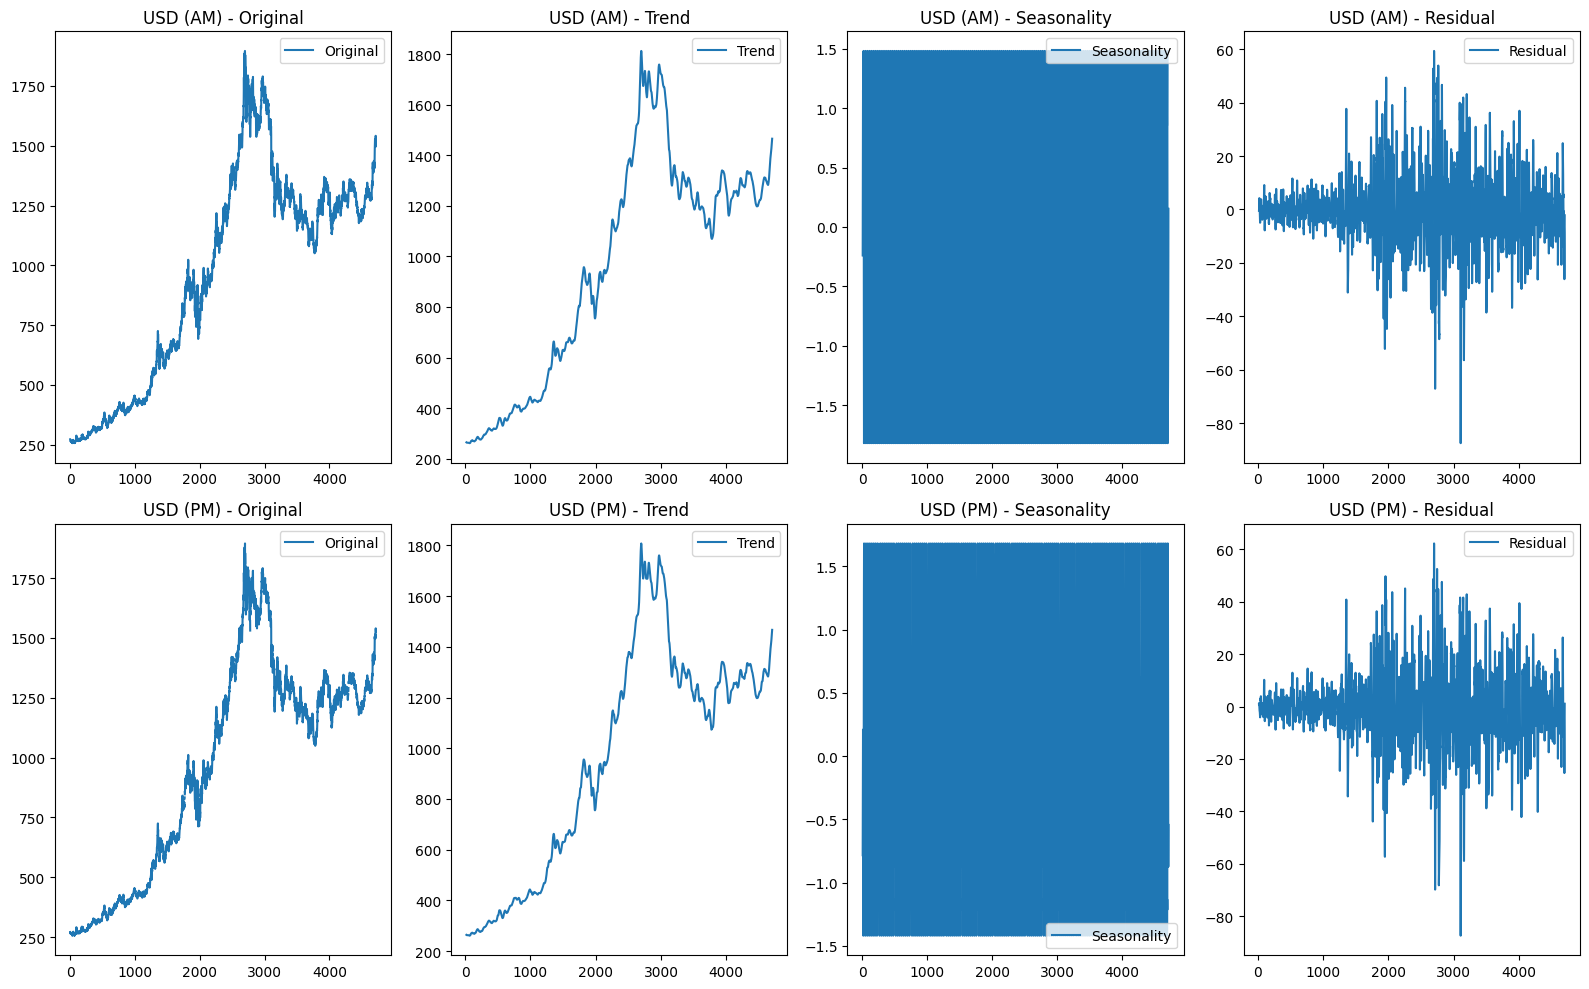

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply 7-day moving average smoothing
df['USD_AM_Smoothed'] = df['USD (AM)'].rolling(window=7).mean()
df['USD_PM_Smoothed'] = df['USD (PM)'].rolling(window=7).mean()

# Decompose the time series to extract trend, seasonality, and residuals
decomposition_am = seasonal_decompose(df['USD_AM_Smoothed'].dropna(), model='additive', period=30)
decomposition_pm = seasonal_decompose(df['USD_PM_Smoothed'].dropna(), model='additive', period=30)

# Plot the decomposition
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# AM decomposition
axes[0, 0].set_title('USD (AM) - Original')
axes[0, 0].plot(df['USD (AM)'], label='Original')
axes[0, 0].legend()

axes[0, 1].set_title('USD (AM) - Trend')
axes[0, 1].plot(decomposition_am.trend, label='Trend')
axes[0, 1].legend()

axes[0, 2].set_title('USD (AM) - Seasonality')
axes[0, 2].plot(decomposition_am.seasonal, label='Seasonality')
axes[0, 2].legend()

axes[0, 3].set_title('USD (AM) - Residual')
axes[0, 3].plot(decomposition_am.resid, label='Residual')
axes[0, 3].legend()

# PM decomposition
axes[1, 0].set_title('USD (PM) - Original')
axes[1, 0].plot(df['USD (PM)'], label='Original')
axes[1, 0].legend()

axes[1, 1].set_title('USD (PM) - Trend')
axes[1, 1].plot(decomposition_pm.trend, label='Trend')
axes[1, 1].legend()

axes[1, 2].set_title('USD (PM) - Seasonality')
axes[1, 2].plot(decomposition_pm.seasonal, label='Seasonality')
axes[1, 2].legend()

axes[1, 3].set_title('USD (PM) - Residual')
axes[1, 3].plot(decomposition_pm.resid, label='Residual')
axes[1, 3].legend()

plt.tight_layout()
plt.show()
